In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('loan_prediction.csv')  
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.isnull().sum()

Shape: (614, 13)
Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

df.loc[:, 'LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df.loc[:, 'Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df.loc[:, 'Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        df.loc[:, col] = LabelEncoder().fit_transform(df[col])

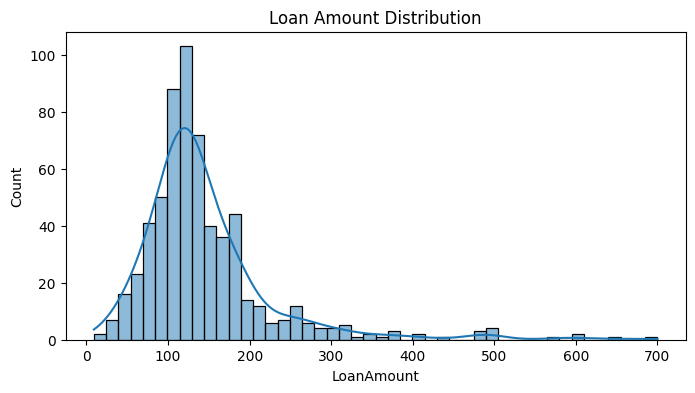

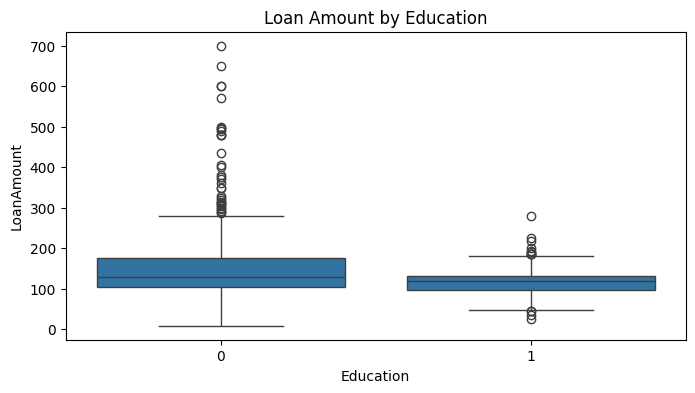

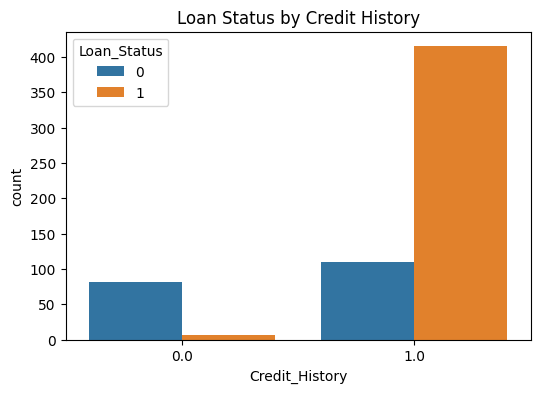

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.show()

In [30]:
df['Loan_Status'] = df['Loan_Status'].astype(int)
print(df['Loan_Status'].unique())
print(df['Loan_Status'].dtype)

from sklearn.model_selection import train_test_split

if 'Loan_ID' in df.columns:
    X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
else:
    X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[1 0]
int64


In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'deprecated'


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

